In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os

if not os.path.exists("images"):
    os.mkdir("images")

# Import and merge datasets

In [2]:
df = pd.read_csv('data/Olympics_Games.csv')
medal = pd.read_csv('data/Olympic_Games_Medal_Tally.csv')
country = pd.read_excel('data/olympic_city_country.xlsx')
place = pd.read_csv('data/nocRegions.csv')

newdf1 = df[['year','city']].merge(medal[['year','country','total']], how='right')

gpd = pd.read_csv('data/API_NY.GDP.MKTP.CD_DS2_en_csv_v2_4701247.csv',skiprows=[0,1,2])
gpd=gpd.fillna(0)
newdf1.head(4)

,year,city,country,total
0,1896,Athina,United States,20
1,1896,Athina,Greece,47
2,1896,Athina,Germany,13
3,1896,Athina,France,11


# data pre-processing 

In [3]:
newdf1['country'][newdf1['country']=='Great Britain']='United Kingdom'
newdf1['country'][newdf1['country']=='West Germany']='Germany'
newdf1.isnull().sum()

<ipython-input-3-57c17dfba5ed>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf1['country'][newdf1['country']=='Great Britain']='United Kingdom'
<ipython-input-3-57c17dfba5ed>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf1['country'][newdf1['country']=='West Germany']='Germany'


year       0
city       0
country    0
total      0
dtype: int64


#  Does hosting the Olympic games and the country's economy affect its performance?


In [4]:
import plotly.express as px
import plotly.io as pio

In [5]:
newdf1.head(4)

,year,city,country,total
0,1896,Athina,United States,20
1,1896,Athina,Greece,47
2,1896,Athina,Germany,13
3,1896,Athina,France,11


In [6]:
pd.unique(newdf1['year'])

array([1896, 1900, 1904, 1908, 1912, 1920, 1924, 1928, 1932, 1936, 1948,
       1952, 1956, 1960, 1964, 1968, 1972, 1976, 1980, 1984, 1988, 1992,
       1996, 2000, 2004, 2008, 2012, 2016, 2020, 1994, 1998, 2002, 2006,
       2010, 2014, 2018, 2022])

In [7]:
country = country.rename(columns={'City': 'city'})
newdf1 = newdf1.rename(columns={'total': 'Medal number', "Country": 'Host country'})
newdf = newdf1.merge(country, how='right').dropna()
newdf = newdf.rename(columns={"Country": 'Host country'})
newdf.head(4)

,year,city,country,Medal number,Host country
1,1900.0,Paris,France,111.0,France
2,1900.0,Paris,United States,48.0,France
3,1900.0,Paris,United Kingdom,38.0,France
4,1900.0,Paris,Belgium,18.0,France


# number of medal won by each country

In [59]:
tmp = newdf.groupby(['country'])['Medal number'].sum()
df4 = pd.DataFrame(data={'Medal': tmp.values}, index=tmp.index).reset_index()
df4 =df4.sort_values(by=['Medal'],ascending=False)
df4.head(4)

,country,Medal
143,United States,5707.0
119,Soviet Union,2825.0
46,Germany,2356.0
141,United Kingdom,2010.0


## a) Number of  olympic games host by country

In [60]:
tmp = newdf.drop_duplicates(subset=['year'])
tmp = tmp.groupby(['Host country'])['Host country'].value_counts()
l= [tmp.index[i][0] for i in range(len(tmp))]
t = {"host country": l,'Number games hosted':tmp.values }
seasoncount = pd.DataFrame(t)
seasoncount.head()

,host country,Number games hosted
0,Australia,1
1,Austria,2
2,Belgium,1
3,Brazil,1
4,Canada,2


## b) Top 12 world countries that have won more medial and hosted at least one Olympic game.

In [64]:

pg =df4[df4['country'].isin(list(seasoncount['host country']))]
pg= pg.rename(columns={"country": 'host country'})
l = pg.merge(seasoncount, how='right').dropna()
GPD=gpd[gpd['Country Name'].isin(list(seasoncount['host country']))]
GPD = GPD.sort_values(by=['2021'],ascending=False)
pfd = pd.DataFrame({'host country': GPD['Country Name'], 'GPD rank':[i for i in range(1,len(GPD['Country Name'])+1)]})

In [105]:
ll = l.merge(pfd, how='right').dropna()
ll['Number games hosted']=ll['Number games hosted'].values.astype(int)
ll =ll.sort_values(by=['Medal'],ascending=False)
ll = ll.head(12)
ll =ll.sort_values(by=['Number games hosted'],ascending=False)
# ll['Number games hosted']=ll['Number games hosted'].values.astype(str)


fig = px.bar(ll, x="Medal", y="host country", pattern_shape="Number games hosted",text='Medal',color="GPD rank",
             color_discrete_sequence =color_continuous_scale,
             title="Top 12 world countries that have won more medal and hosted at least one Olympic game between 1986-2022.",
labels={ # replaces default labels by column name
                "Number games hosted": "Number of Olympic games hosted",
                'GPD rank': "World GPD rank"
            })
fig.update_layout(legend=dict(
    yanchor="bottom",
    y=0.03,
    xanchor="right",
    x=.97
))
fig.update_layout({
'plot_bgcolor': 'rgba(0, 0, 0, 0)',
'paper_bgcolor': 'rgba(0, 0, 0, 0)',
})
fig.update_layout(yaxis=dict(autorange="reversed"), legend_title_font_color="black",
                  font_color="black",legend = dict(font = dict(size = 12)),
    title_font_color="black",)
fig.update_yaxes(title_text='')
fig.update_traces(textposition='outside')
fig.show()



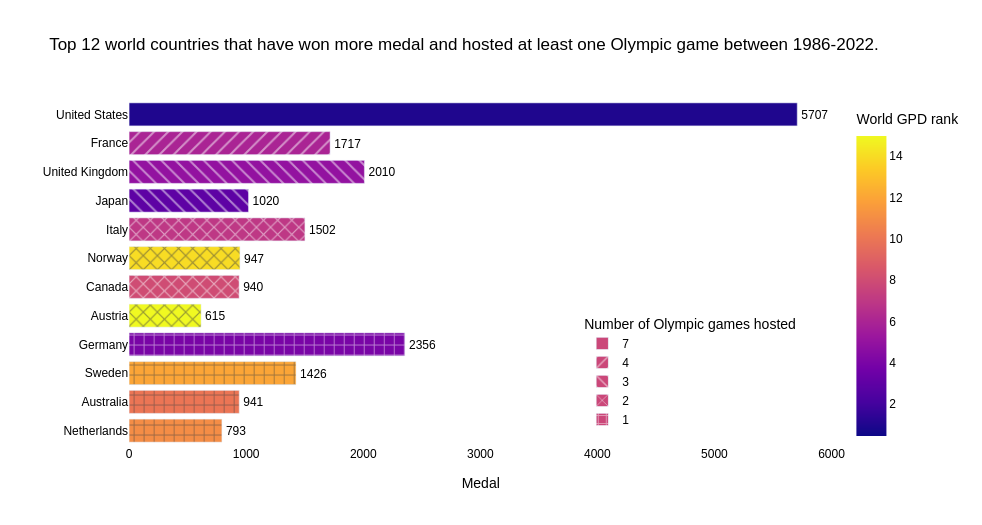

 For example, you might use color to highlight specific columns for storytelling. Colors can also be used if they are meaningful for the categories posted (e.g. to match company or team colors).

## c) Top African countries that have won more medail 

**If the Olympic performance of the riches countries is affected by the place where the games were organised. Therefore what about the country that can not organise the Olympic games?**

In [103]:
pga =gpd[gpd['Country Name'].isin(['Cameroon','Nigeria','Algeria','South Africa','Kenya','Ethiopia','Ghana'])]
pga = pga.sort_values(by=['2021'],ascending=False)
fda = pd.DataFrame({'country':list(pga['Country Name']), 'Africa GPD rank':[i for i in range(1,len(pga)+1)]})
tmp = newdf.groupby(['country'])['Medal number'].sum()
df6 = pd.DataFrame(data={'Medal': tmp.values}, index=tmp.index).reset_index()
df6 = df6.merge(fda, how='right').dropna()


df6= df6.sort_values(by=['Medal'],ascending=False)
fig = px.bar(df6, x="Medal", y="country",text='Medal',color="Africa GPD rank",
             color_discrete_sequence =color_continuous_scale,
             title="Africa countries that have won more medal between 1986-2022.",
labels={ # replaces default labels by column name
                "Number games hosted": "Number of Olympic games hosted",
                'GPD rank': "World GPD rank"
            })
fig.update_layout(legend=dict(
    yanchor="bottom",
    y=0.03,
    xanchor="right",
    x=.97
))
fig.update_layout({
'plot_bgcolor': 'rgba(0, 0, 0, 0)',
'paper_bgcolor': 'rgba(0, 0, 0, 0)',
})
fig.update_layout(yaxis=dict(autorange="reversed"), legend_title_font_color="black",
                  font_color="black",legend = dict(font = dict(size = 12)),
    title_font_color="black",)
fig.update_yaxes(title_text='')
fig.update_traces(textposition='outside')
fig.show()



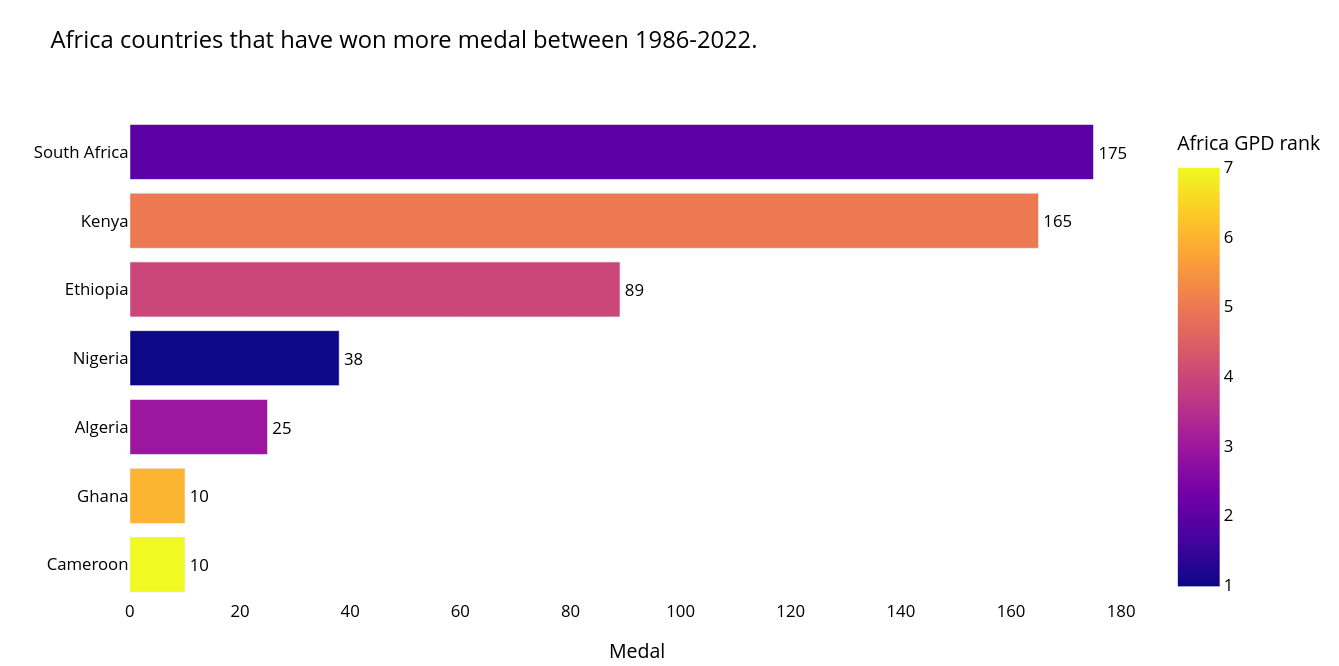

# Trend of the nomber of medal for the 10 top countries that have gain more medal

1. Host Country Effect- What is the probability that a participant of the host country can win a medal? Are there any type of sports that the host country has more chance of winning?

2. Economic Effect- Are there any sports that are won mostly by countries with low GDP? Does the rise/fall in economy affect the Olympic winnings of a country, and if so, in how many years is the effect seen?

3. Age Effect- Does the Relative Age Effect influence Olympic winnings? At what age is optimum age for each sport? How does the performance of each athlete improve/degrade over time?

Moreover, looking at the medals count in Olympics official site[4] and comparing with the Olympics history dataset used in this report, there are discrepancies, hence the dataset needs to be revised.